# Problem 3

In [1]:
import ema as em
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [2]:
#Remove
mdl = em.Model(2,3)
n = mdl.dnodes
e = mdl.delems

mdl.material('default', 1000)
mdl.xsection('default', 10000000000, 50)
xt = mdl.xsection('truss', 20, 1)

mdl.node('1',  0.0, 0.0)
mdl.node('2',  8.0, 0.0)
mdl.node('3',  8.0, 6.0)
mdl.node('4', 16.0, 6.0)

mdl.beam('a', n['1'], n['2'])
mdl.beam('b', n['2'], n['3'])
mdl.beam('c', n['3'], n['4'])
mdl.truss('d', n['2'], n['4'], xsec=xt)

mdl.fix(n['1'], ['y'])
mdl.fix(n['4'], ['x', 'y', 'rz'])
mdl.numDOF()
# mdl.DOF = [[1, 5, 6],[1, 2, 3],[7, 2, 4],[7, 8, 9]]

[[1, 9, 2], [3, 4, 5], [6, 7, 8], [10, 11, 12]]

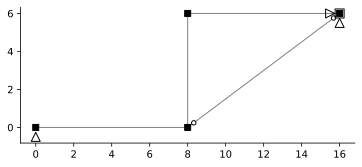

In [3]:
fig, ax = plt.subplots(1,1)
em.plot_structure(mdl, ax)

In [4]:
mdl.redundant(e['b'], '3')
mdl.redundant(e['d'], '1')
B = em.B_matrix(mdl)
B.barx

,$b_3$,$d_1$
$a_1$,0.000,0.0
$a_2$,0.000,0.0
$a_3$,1.000,4.8
$b_1$,-0.125,-1.2
$b_2$,-1.000,-4.8
$b_3$,1.000,0.0
$c_1$,0.000,-0.8
$c_2$,-1.000,0.0
$c_3$,2.000,9.6
$d_1$,0.000,1.0


In [5]:
Q = em.column_vector(B)
A = em.A_matrix(mdl)
Vi = em.V_vector(A)

k0 = -0.002014
DL =  0.033333
e['a'].e0['2'] = -k0
e['a'].e0['3'] = -k0
e['b'].e0['2'] =  k0
e['b'].e0['3'] =  k0
e['d'].e0['1'] =  DL/e['d'].L

In [6]:
Q0 = em.Q_vector(B).o
Q0

,$Q_{{}}$
$a_1$,-0.000
$a_2$,100.700
$a_3$,-100.700
$b_1$,-0.000
$b_2$,-100.700
$b_3$,100.700
$c_1$,-0.000
$c_2$,0.000
$c_3$,0.000
$d_1$,-66.666


In [7]:
Uf = em.analysis.SolveDispl(mdl)
K = em.K_matrix(mdl)
U = em.U_vector(A, Uf)
V = A.f@Uf
Q = K.s@V + Q0
Q

,$Vector_{{fffff}}$
$a_{1}$,0.000000e+00
$a_{2}$,-3.000000e-14
$a_{3}$,-4.845169e+01
$b_{1}$,2.894265e+01
$b_{2}$,4.845169e+01
$b_{3}$,1.346379e+02
$c_{1}$,3.051493e+01
$c_{2}$,-1.346379e+02
$c_{3}$,-9.690340e+01
$d_{1}$,-3.814366e+01


## Part 1

In [8]:
K = em.K_matrix(mdl)
K.f

,$1$,$2$,$3$,$4$,$5$,$6$,$7$,$8$
$P_{1}$,1.250000e+12,0.0,-1.250000e+12,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
$P_{2}$,0.000000e+00,25000.0,0.000000e+00,-4.687500e+03,12500.000000,0.000000e+00,0.000000e+00,0.000000
$P_{3}$,-1.250000e+12,0.0,1.250000e+12,9.600000e+02,-8333.333333,-2.777778e+03,0.000000e+00,-8333.333333
$P_{4}$,0.000000e+00,-4687.5,9.600000e+02,1.666667e+12,-4687.500000,0.000000e+00,-1.666667e+12,0.000000
$P_{5}$,0.000000e+00,12500.0,-8.333333e+03,-4.687500e+03,58333.333333,8.333333e+03,0.000000e+00,16666.666667
$P_{6}$,0.000000e+00,0.0,-2.777778e+03,0.000000e+00,8333.333333,1.250000e+12,0.000000e+00,8333.333333
$P_{7}$,0.000000e+00,0.0,0.000000e+00,-1.666667e+12,0.000000,0.000000e+00,1.666667e+12,4687.500000
$P_{8}$,0.000000e+00,0.0,-8.333333e+03,0.000000e+00,16666.666667,8.333333e+03,4.687500e+03,58333.333333


In [9]:
UK = K.f.inv@[0, 6250, -100000, 50000]
UK

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 8)

In [ ]:
UL = K.f.inv@[1600, 1200., 0., 0.]
UL

In [ ]:
# Q.set_item('a_2', 87.947)
# Q.set_item('a_3', 54.824)
# Q.set_item('b_2',-54.824)
# Q.set_item('b_3', 22.844)
# Q.set_item('c_2',-22.844)
# Q.set_item('d_1', 15.497)